Epoch 1/50, Loss: 0.053050
Epoch 2/50, Loss: 0.009562
Epoch 3/50, Loss: 0.001298
Epoch 4/50, Loss: 0.000567
Epoch 5/50, Loss: 0.000458
Epoch 6/50, Loss: 0.000420
Epoch 7/50, Loss: 0.000394
Epoch 8/50, Loss: 0.000408
Epoch 9/50, Loss: 0.000391
Epoch 10/50, Loss: 0.000402
Epoch 11/50, Loss: 0.000354
Epoch 12/50, Loss: 0.000382
Epoch 13/50, Loss: 0.000353
Epoch 14/50, Loss: 0.000337
Epoch 15/50, Loss: 0.000325
Epoch 16/50, Loss: 0.000316
Epoch 17/50, Loss: 0.000340
Epoch 18/50, Loss: 0.000345
Epoch 19/50, Loss: 0.000329
Epoch 20/50, Loss: 0.000308
Epoch 21/50, Loss: 0.000309
Epoch 22/50, Loss: 0.000306
Epoch 23/50, Loss: 0.000322
Epoch 24/50, Loss: 0.000365
Epoch 25/50, Loss: 0.000344
Epoch 26/50, Loss: 0.000274
Epoch 27/50, Loss: 0.000290
Epoch 28/50, Loss: 0.000316
Epoch 29/50, Loss: 0.000279
Epoch 30/50, Loss: 0.000266
Epoch 31/50, Loss: 0.000264
Epoch 32/50, Loss: 0.000264
Epoch 33/50, Loss: 0.000254
Epoch 34/50, Loss: 0.000257
Epoch 35/50, Loss: 0.000284
Epoch 36/50, Loss: 0.000258
E

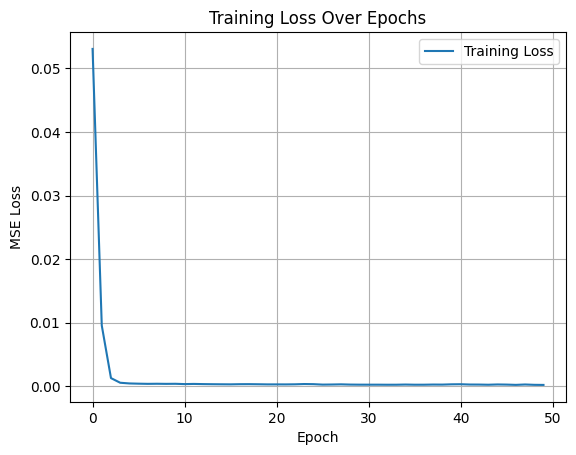

Name: THIRUMALAI K
Register Number: 212224240176


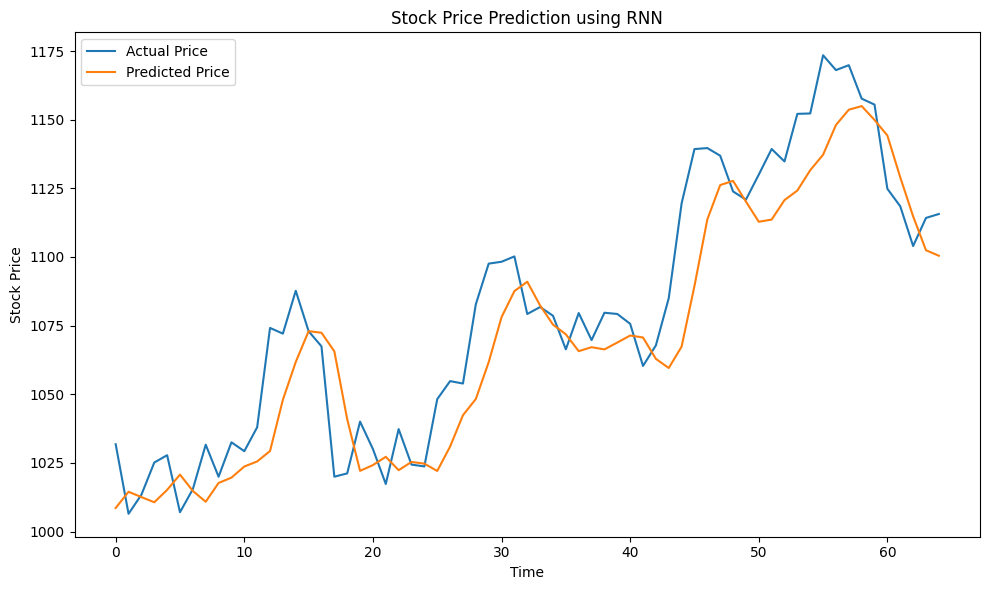

Last Predicted Price: 1100.44
Actual Price:          1115.65


In [4]:
# -------------------------------------------------------------
# 🎯 Stock Price Prediction using RNN (Complete Project)
# Developed by: [THIRUMALAI K]
# -------------------------------------------------------------

# ✅ Step 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# ✅ Step 2: Load & Preprocess Dataset
df_train = pd.read_csv('trainset.csv')
df_test = pd.read_csv('testset.csv')

train_prices = df_train['Close'].values.reshape(-1, 1)
test_prices = df_test['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_prices)
scaled_test = scaler.transform(test_prices)

def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 60
x_train, y_train = create_sequences(scaled_train, seq_length)
x_test, y_test = create_sequences(scaled_test, seq_length)

# Convert to tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# ✅ Prepare DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# ✅ Step 3: Define RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])  # Take the output from last timestep

# ✅ Step 4: Initialize Model
model = RNNModel()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# ✅ Optional: Print Summary
!pip install -q torchinfo
from torchinfo import summary
summary(model, input_size=(64, 60, 1))

# ✅ Step 5: Setup Loss + Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ✅ Step 6: Train the Model
epochs = 50
train_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        output = model(xb)
        loss = criterion(output, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.6f}")

# ✅ Step 7: Plot Training Loss
print('Name: THIRUMALAI K')
print('Register Number: 212224240176')
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Step 8: Predict on Test Set
model.eval()
with torch.no_grad():
    predicted = model(x_test_tensor.to(device)).cpu().numpy()
    actual = y_test_tensor.cpu().numpy()

# Inverse scale predictions
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(actual)

# ✅ Plot Predicted vs Actual Prices
print('Name: THIRUMALAI K')
print('Register Number: 212224240176')
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using RNN')
plt.legend()
plt.tight_layout()
plt.show()

# ✅ Final Prediction Output
print(f'Last Predicted Price: {predicted_prices[-1][0]:.2f}')
print(f'Actual Price:          {actual_prices[-1][0]:.2f}')